# Loan Approval Prediction
This notebook presents a structured machine learning pipeline to predict loan approval outcomes based on applicant information. We'll explore the dataset, clean and preprocess the data, apply multiple classification models, and evaluate their performance.

## 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Visual settings
sns.set(style="whitegrid")
plt.style.use("ggplot")


## 2. Data Loading and Initial Exploration

In [2]:
# Load dataset
df = pd.read_csv("LoanApprovalPrediction.csv")

# Preview the data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


EXPLORATORY DATA ANALYSIS

In [3]:
df.info()
df.describe()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df = df.drop(columns="Loan_ID")
(df.isnull().sum() / len(df)) * 100

Gender               0.000000
Married              0.000000
Dependents           2.006689
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.511706
Loan_Amount_Term     2.341137
Credit_History       8.193980
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

There are some  NULLS in the dataset, these nulls will be imputed using SimpleImputer

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', 'constant'
df[['Dependents', 'LoanAmount','Loan_Amount_Term','Credit_History']] = imputer.fit_transform(df[['Dependents', 'LoanAmount','Loan_Amount_Term','Credit_History']])
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,0.997572,5807.265364,2953.315785,81.236564,64.436899,0.348551
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,128.000000,360.000000,1.000000
75%,1.000000,5746.000000,2324.000000,163.500000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


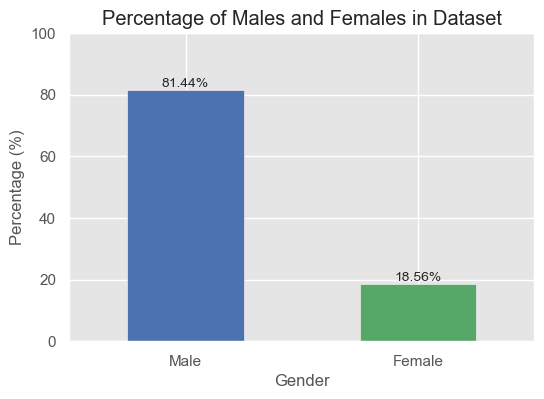

In [6]:
gender_percentages = (df['Gender'].value_counts(normalize=True) * 100).round(2)

plt.figure(figsize=(6,4))
gender_percentages.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title('Percentage of Males and Females in Dataset')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)

for i, v in enumerate(gender_percentages):
    plt.text(i, v + 1, f"{v}%", ha='center')

plt.show()


There are generally more males requesting for loans in the dataset

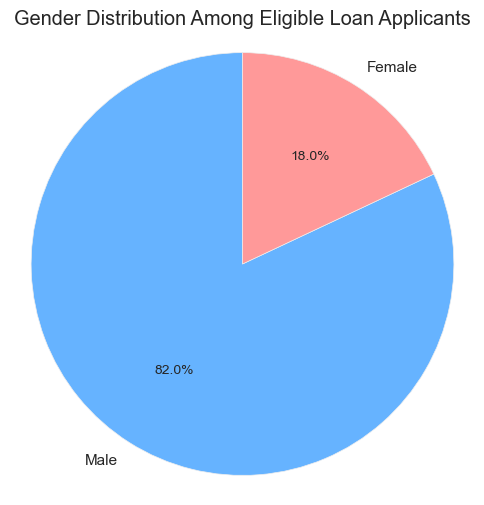

In [7]:
# Filter eligible applicants
eligible = df[df['Loan_Status'] == 'Y']

# Count gender distribution among eligible
gender_counts = eligible['Gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution Among Eligible Loan Applicants')
plt.axis('equal') 
plt.show()

In [ ]:
# Converting string labels into numeric form.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
    df[col] = label_encoder.fit_transform(df[col])

<Axes: >

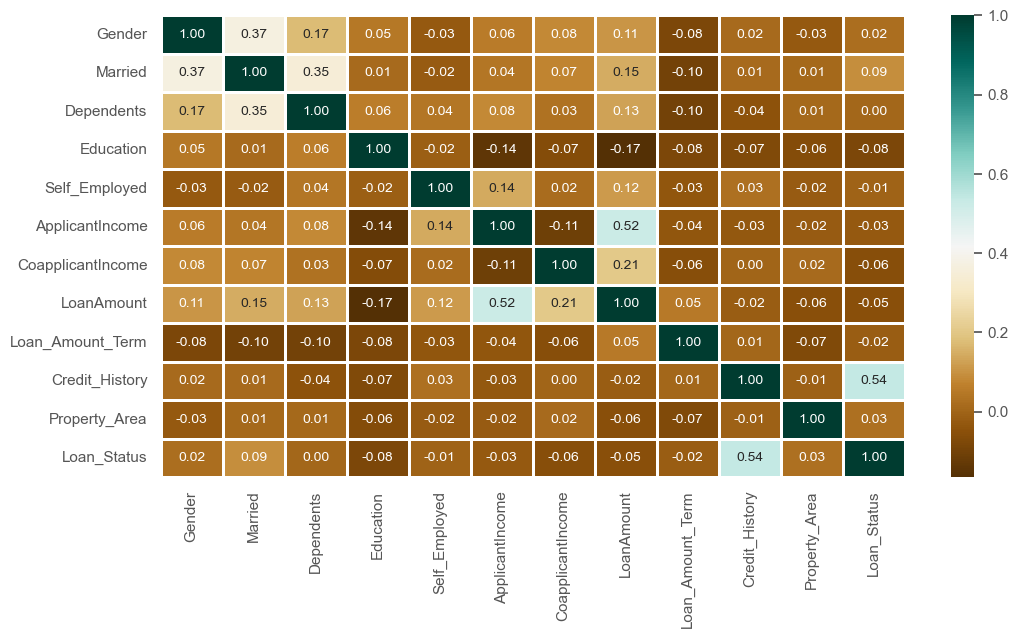

In [ ]:
#correlation Heatmap
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

There is a correlation between Loan Amount and ApplicantIncome. We also see that Credit_History has a high impact on Loan_Status

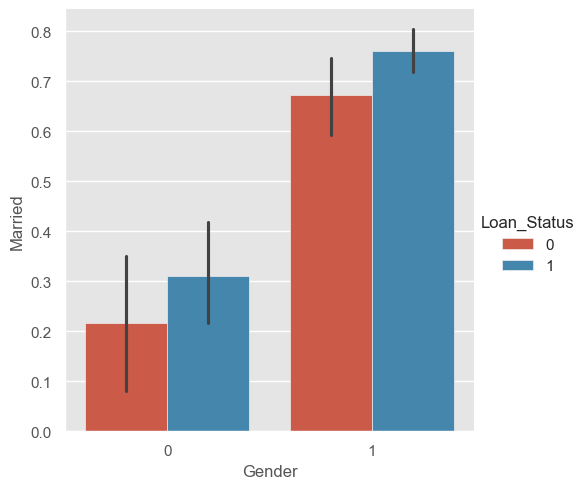

In [10]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status", 
            kind="bar", 
            data=df)

In [11]:
percentages = (df['Loan_Status'].value_counts(normalize=True) * 100).round(2)

print(f"Percentage of Yes (Y): {percentages.get(1, 0)}%")
print(f"Percentage of No (N): {percentages.get(0, 0)}%")

Percentage of Yes (Y): 68.73%
Percentage of No (N): 31.27%


## 3. BASELINE MODEL SELECTION

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.25,
                                                    random_state=42)

In [13]:
#SInce there was a clear class imbalance,SMOTE will be utilized to oversample the minority class (N0)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)




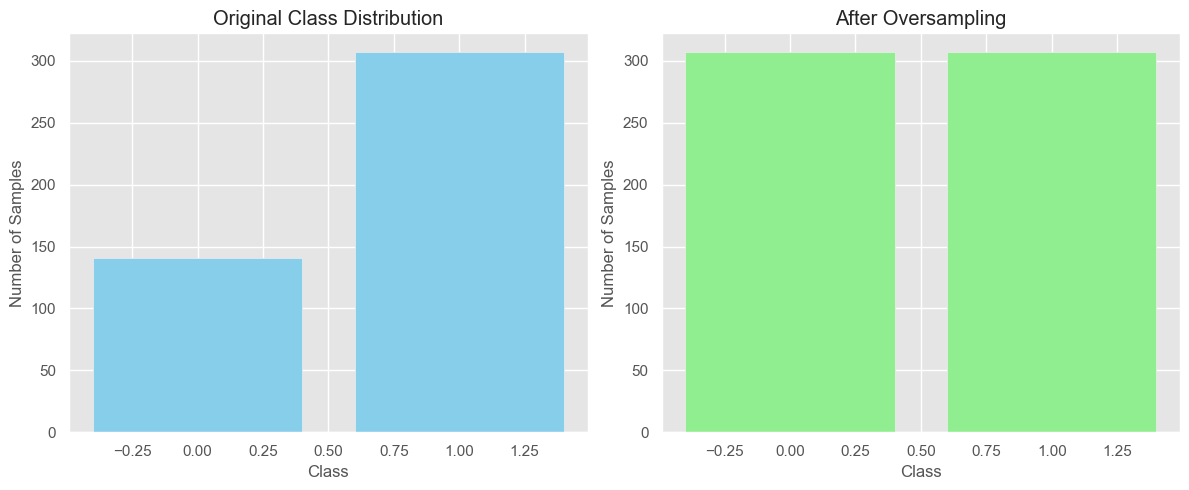

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

# Original class distribution
original_counts = Counter(Y_train)

# After oversampling (assuming X_train_resampled, y_train_resampled from earlier)
resampled_counts = Counter(Y_train_resampled)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(original_counts.keys(), original_counts.values(), color='skyblue')
axes[0].set_title('Original Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Number of Samples')

axes[1].bar(resampled_counts.keys(), resampled_counts.values(), color='lightgreen')
axes[1].set_title('After Oversampling')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Number of Samples')

plt.tight_layout()
plt.show()


In [ ]:
# Function to train and evaluate multiple baseline classification models.
# It compares Random Forest, Logistic Regression, SVM, and KNN using key performance metrics.
# For each model, it:
#   - Fits the model to the training data
#   - Makes predictions on the test set
#   - Calculates Accuracy, Precision, Recall, F1 Score, and ROC AUC
#   - Displays the Confusion Matrix as a heatmap
#   - Plots the ROC Curve to visualize model performance
# This helps identify the most effective baseline model before moving to more complex techniques.

def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
    }

    for name, model in models.items():
        print(f" Evaluating: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        try:
            y_prob = model.predict_proba(X_test)[:, 1]
        except AttributeError:
            y_prob = model.decision_function(X_test)
            y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalize to [0,1]

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)

        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")
        print(f"F1 Score:  {f1:.4f}")
        print(f"ROC AUC:   {roc_auc:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure()
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"{name} - ROC Curve")
        plt.legend()
        plt.show()


 Evaluating: Random Forest
Accuracy:  0.7400
Precision: 0.7778
Recall:    0.8750
F1 Score:  0.8235
ROC AUC:   0.7504


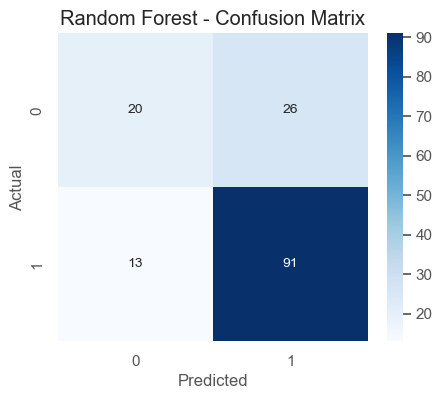

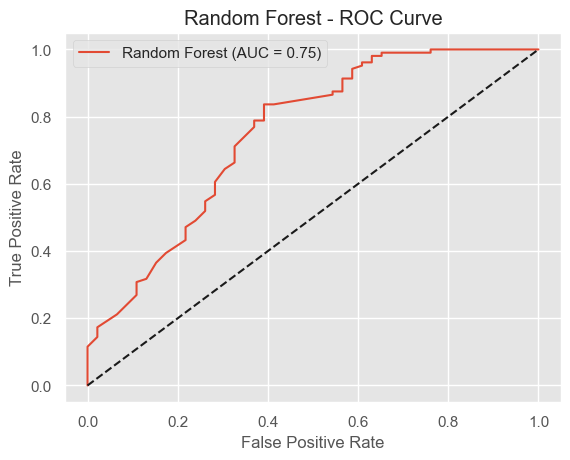

 Evaluating: Logistic Regression
Accuracy:  0.7333
Precision: 0.7909
Recall:    0.8365
F1 Score:  0.8131
ROC AUC:   0.6915


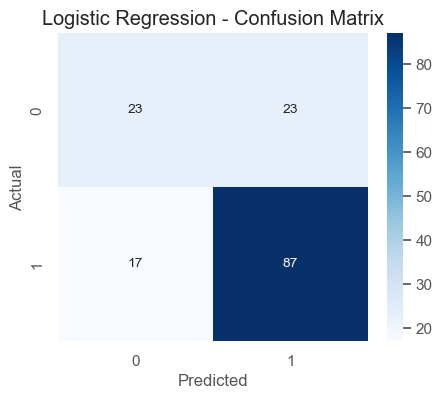

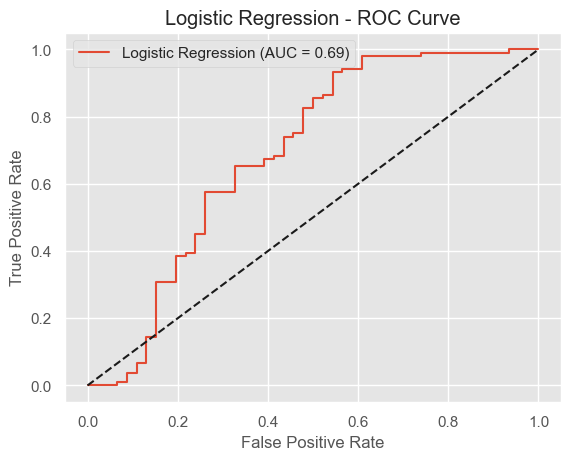

 Evaluating: SVM
Accuracy:  0.4800
Precision: 0.6806
Recall:    0.4712
F1 Score:  0.5568
ROC AUC:   0.4718


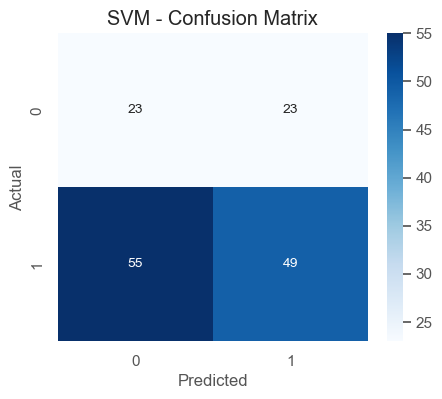

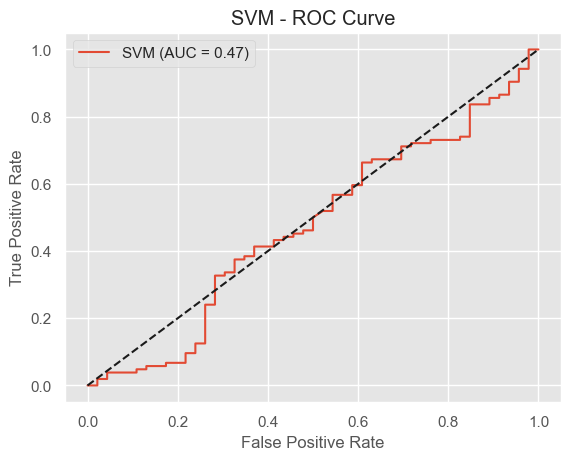

 Evaluating: K-Nearest Neighbors
Accuracy:  0.5733
Precision: 0.7381
Recall:    0.5962
F1 Score:  0.6596
ROC AUC:   0.5841


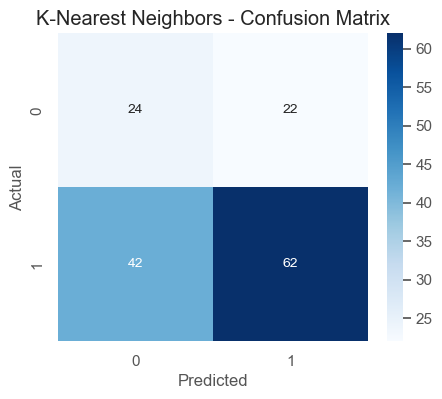

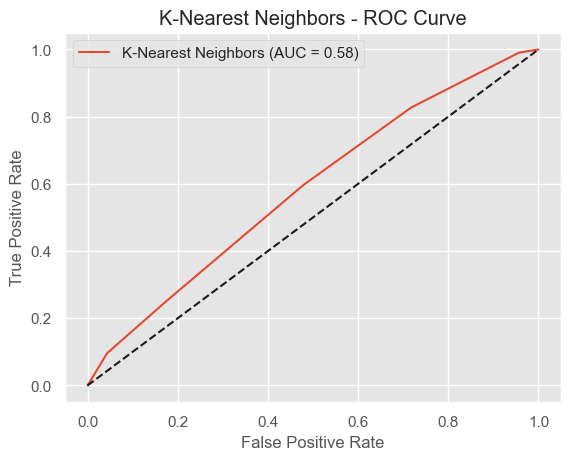

In [18]:
evaluate_models(X_train_resampled, X_test, Y_train_resampled, Y_test)


### Model Insights

Among all the models evaluated, **Random Forest** achieved the best overall performance:

- **Accuracy:** 74.00%
- **Precision:** 77.78%
- **Recall:** 87.50%
- **F1 Score:** 82.35%
- **ROC AUC:** 75.04%

These results suggest that Random Forest strikes a strong balance between precision and recall, making it the most effective baseline model for predicting loan approval in this dataset.


## 4. MODEL SELECTION AND TUNING

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_resampled, Y_train_resampled)
print("Best Parameters:", grid_search.best_params_)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]


print(classification_report(Y_test, y_pred))
print("ROC AUC:", roc_auc_score(Y_test, y_prob))



              precision    recall  f1-score   support

           0       0.71      0.43      0.54        46
           1       0.79      0.92      0.85       104

    accuracy                           0.77       150
   macro avg       0.75      0.68      0.70       150
weighted avg       0.76      0.77      0.75       150

ROC AUC: 0.74435618729097


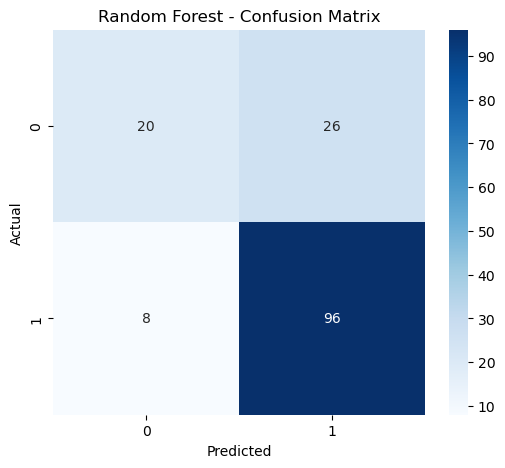

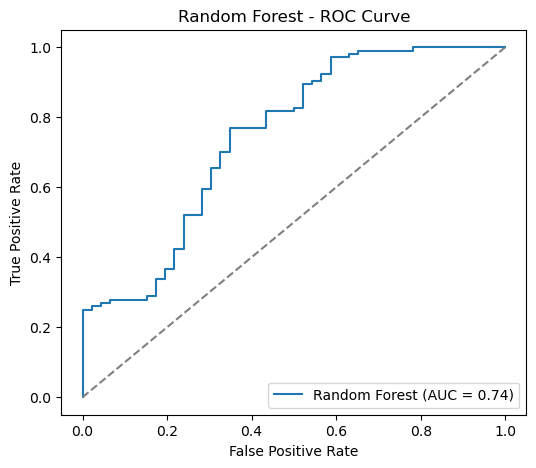

In [40]:
# Predict labels and probabilities
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]  # probability for positive class

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
roc_auc = roc_auc_score(Y_test, y_prob)
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Tuned Model Performance

- The model achieved an overall **accuracy of 77%**.
- **Recall for class 1 (approved)** reached **92%**, indicating the model correctly identifies most approved applications.
- **Precision for class 1** remained strong at **79%**, showing a low rate of false positives.
- **ROC AUC:** 74.44%
- Despite class imbalance being addressed with SMOTE, recall for the denied class remains lower (43%), indicating potential overlap in feature space or insufficient signal for that class.

Overall, the tuned model offers a strong foundation, particularly for minimizing false negatives in approval decisions, which is often a priority in financial risk settings.


### Next Steps

To further improve the model’s robustness and fairness:

1. **Threshold Optimization**: Adjust the classification threshold to find a better balance between precision and recall for both classes.
2. **Feature Engineering**: Introduce domain-specific features (e.g., credit-to-income ratio, employment duration buckets) to improve model expressiveness.
3. **Ensemble Techniques**: Explore advanced ensembling methods like Gradient Boosting (e.g., XGBoost, LightGBM) for potential performance gains.
4. **Cross-Validation**: Use k-fold cross-validation to ensure model generalization across different subsets of data.

These steps can help transform the current model into a production-ready solution with stronger reliability and transparency.
